In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import zipfile
import os

# Define the path to the uploaded zip file and the directory to extract to
zip_path = "archive.zip"
extract_dir = "fraud_data"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
extracted_files = os.listdir(extract_dir)
extracted_files

['fraudTest.csv', 'fraudTrain.csv']

🔍 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0



❗ Missing Values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

⚖️ Class Distribution:
is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64


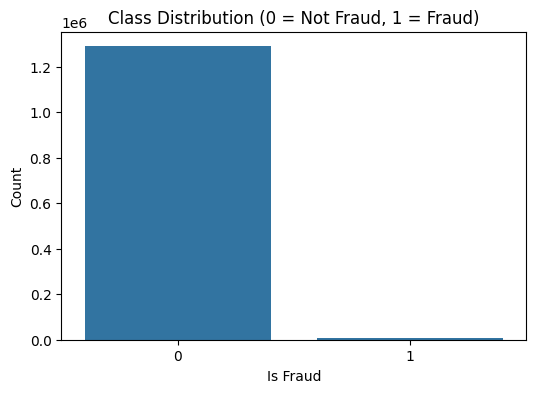


📊 Summary Statistics (Numerical Features):


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
train_df = pd.read_csv("fraudTrain.csv")  # Update path if needed

# Display basic info
print("🔍 Dataset Overview:\n")
print(train_df.info())

# Show the first few rows
print("\n📌 First 5 Rows:")
display(train_df.head())

# Check for missing values
print("\n❗ Missing Values:")
print(train_df.isnull().sum())

# Check class distribution
print("\n⚖️ Class Distribution:")
print(train_df['is_fraud'].value_counts(normalize=True))

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='is_fraud')
plt.title("Class Distribution (0 = Not Fraud, 1 = Fraud)")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# Summary statistics for numerical features
print("\n📊 Summary Statistics (Numerical Features):")
display(train_df.describe())

In [4]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
df = train_df.copy()

# --- 1. Drop unnecessary columns (if any) ---
# 'Unnamed: 0' is usually just an index column; we can drop it
if 'Unnamed: 0' in df.columns:
    df.drop(columns='Unnamed: 0', inplace=True)

# --- 2. Handle missing values ---
print("Missing values before cleaning:\n", df.isnull().sum())

# Option: Drop rows with missing values (only if few are missing)
df.dropna(inplace=True)

# --- 3. Convert date columns to datetime (if present) ---
if 'trans_date_trans_time' in df.columns:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# --- 4. Encode categorical variables ---
# Identify object-type columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:\n", cat_cols)

# Use Label Encoding for simplicity (or One-Hot for tree-based models)
le = LabelEncoder()
for col in cat_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except:
        print(f"Could not encode {col}")

# --- 5. Check final structure ---
print("\n✅ Cleaned DataFrame Info:")
print(df.info())

Missing values before cleaning:
 trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Categorical Columns:
 ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

✅ Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --

In [5]:
# Make a fresh copy of the cleaned dataset
df_fe = df.copy()

# --- 1. Extract datetime features from 'trans_date_trans_time' ---
# Only if we haven't already dropped it or encoded it
if 'trans_date_trans_time' in train_df.columns:
    df_fe['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
    df_fe['hour'] = df_fe['trans_date_trans_time'].dt.hour
    df_fe['day'] = df_fe['trans_date_trans_time'].dt.day
    df_fe['weekday'] = df_fe['trans_date_trans_time'].dt.weekday
    df_fe['month'] = df_fe['trans_date_trans_time'].dt.month
    # Drop original datetime to avoid redundancy
    df_fe.drop(columns='trans_date_trans_time', inplace=True)

# --- 2. Transaction Amount Bucketing ---
# Log-transform the transaction amount (optional but common)
import numpy as np
df_fe['amt_log'] = np.log1p(df_fe['amt'])

# --- 3. Frequency-based features ---
# Example: Number of transactions per user
if 'user' in train_df.columns:
    user_freq = df_fe['user'].value_counts().to_dict()
    df_fe['user_txn_count'] = df_fe['user'].map(user_freq)

# --- 4. Merchant or Category frequency encoding (optional) ---
if 'merchant' in df_fe.columns:
    merchant_freq = df_fe['merchant'].value_counts().to_dict()
    df_fe['merchant_freq'] = df_fe['merchant'].map(merchant_freq)

# --- 5. Drop or update any columns not useful for modeling ---
drop_cols = ['cc_num', 'first', 'last', 'street', 'city', 'zip', 'trans_num', 'unix_time', 'dob', 'merch_lat', 'merch_long']
df_fe.drop(columns=[col for col in drop_cols if col in df_fe.columns], inplace=True)

# --- 6. Final check ---
print("✅ Feature-Engineered DataFrame:")
print(df_fe.head())
print("\nShape:", df_fe.shape)

✅ Feature-Engineered DataFrame:
   merchant  category     amt  gender  state      lat      long  city_pop  \
0       514         8    4.97       0     27  36.0788  -81.1781      3495   
1       241         4  107.23       0     47  48.8878 -118.2105       149   
2       390         0  220.11       1     13  42.1808 -112.2620      4154   
3       360         2   45.00       1     26  46.2306 -112.1138      1939   
4       297         9   41.96       1     45  38.4207  -79.4629        99   

   job  is_fraud  hour  day  weekday  month   amt_log  merchant_freq  
0  370         0     0    1        1      1  1.786747           1267  
1  428         0     0    1        1      1  4.684259           2503  
2  307         0     0    1        1      1  5.398660           1895  
3  328         0     0    1        1      1  3.828641           2613  
4  116         0     0    1        1      1  3.760269           1592  

Shape: (1296675, 16)


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df_fe.drop(columns=['is_fraud'])
y = df_fe['is_fraud']

# Split into training and validation sets (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to training set only (not to validation!)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class balance
print("🔁 After SMOTE Resampling:")
print(pd.Series(y_train_res).value_counts())

🔁 After SMOTE Resampling:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# --- Logistic Regression ---
print("🔹 Logistic Regression")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)

y_pred_log = log_model.predict(X_val)
y_prob_log = log_model.predict_proba(X_val)[:, 1]

print(confusion_matrix(y_val, y_pred_log))
print(classification_report(y_val, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_val, y_prob_log))

# --- Random Forest Classifier ---
print("\n🔸 Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_val, y_prob_rf))

🔹 Logistic Regression


C:\Users\Shik\.conda\envs\py311\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[242134  15700]
 [   360   1141]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    257834
           1       0.07      0.76      0.12      1501

    accuracy                           0.94    259335
   macro avg       0.53      0.85      0.55    259335
weighted avg       0.99      0.94      0.96    259335

ROC-AUC Score: 0.8687042993959151

🔸 Random Forest
[[257210    624]
 [   260   1241]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.67      0.83      0.74      1501

    accuracy                           1.00    259335
   macro avg       0.83      0.91      0.87    259335
weighted avg       1.00      1.00      1.00    259335

ROC-AUC Score: 0.992149708913363


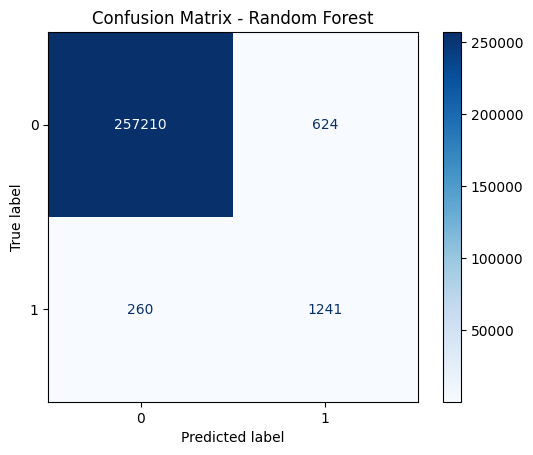

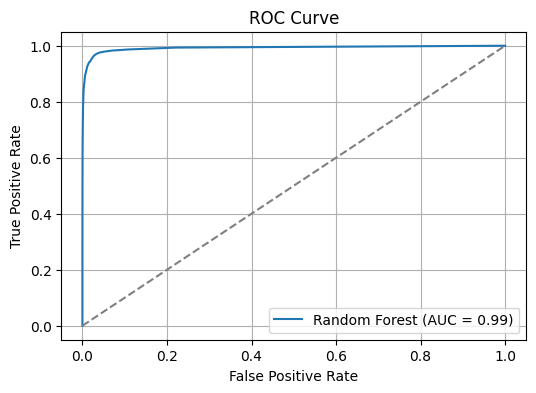

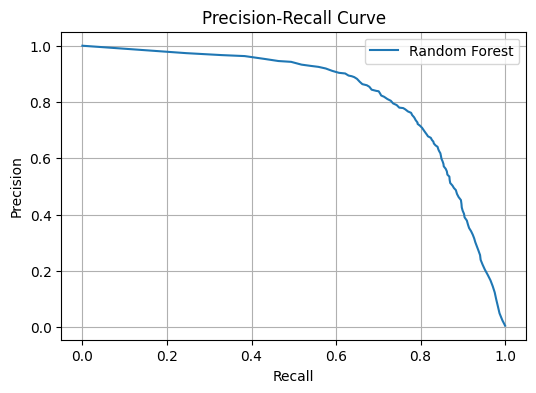

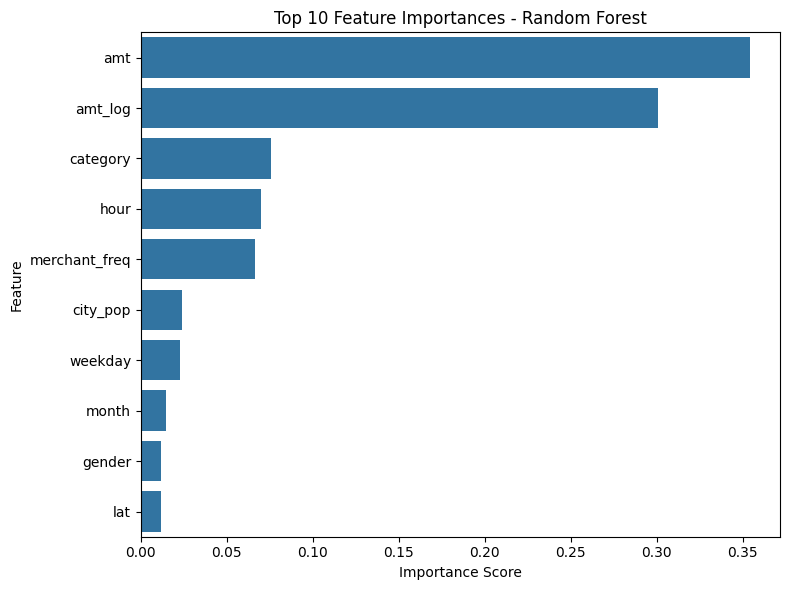

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, ConfusionMatrixDisplay

# --- 1. Confusion Matrix for Random Forest ---
ConfusionMatrixDisplay.from_estimator(rf_model, X_val, y_val, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# --- 2. ROC Curve ---
fpr, tpr, _ = roc_curve(y_val, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_val, y_prob_rf)))
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_val, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

# --- 4. Feature Importance (Random Forest only) ---
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort and plot
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [12]:
# Step 1: Load the test set
test_df = pd.read_csv("fraudTest.csv")  # Update path if needed
test_df.drop(columns='Unnamed: 0', inplace=True, errors='ignore')

# Step 2: Preprocessing (same as training)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df.dropna(inplace=True)

# Datetime features
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['day'] = test_df['trans_date_trans_time'].dt.day
test_df['weekday'] = test_df['trans_date_trans_time'].dt.weekday
test_df['month'] = test_df['trans_date_trans_time'].dt.month
test_df.drop(columns='trans_date_trans_time', inplace=True)

# Log-transform amount
import numpy as np
# Log-transform amount
test_df['amt_log'] = np.log1p(test_df['amt'])

# If 'merchant' exists, use frequency encoding
if 'merchant' in test_df.columns:
    merchant_freq_test = test_df['merchant'].value_counts().to_dict()
    test_df['merchant_freq'] = test_df['merchant'].map(merchant_freq_test)

# Remove user frequency block if 'user' column doesn't exist

# Drop non-informative or PII columns
drop_cols = ['cc_num', 'first', 'last', 'street', 'city', 'zip', 'trans_num', 'unix_time', 'dob', 'merch_lat', 'merch_long']
test_df.drop(columns=[col for col in drop_cols if col in test_df.columns], inplace=True)

# Encode any remaining categorical columns
cat_cols_test = test_df.select_dtypes(include='object').columns.tolist()
for col in cat_cols_test:
    try:
        test_df[col] = le.fit_transform(test_df[col])
    except:
        print(f"Could not encode {col}")

# Step 3: Define features and target
X_test = test_df.drop(columns='is_fraud')
y_test = test_df['is_fraud']

# Step 4: Predict using trained model
y_pred_test = rf_model.predict(X_test)
y_prob_test = rf_model.predict_proba(X_test)[:, 1]

# Step 5: Evaluate (light version)
from sklearn.metrics import classification_report, roc_auc_score

print("📋 Final Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))

print(f"🏁 Test Set ROC-AUC Score: {roc_auc_score(y_test, y_prob_test):.4f}")

📋 Final Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.02      0.27      0.03      2145

    accuracy                           0.93    555719
   macro avg       0.51      0.61      0.50    555719
weighted avg       0.99      0.93      0.96    555719

🏁 Test Set ROC-AUC Score: 0.7757


In [1]:
import sys
import numpy
import pandas
import sklearn
import seaborn
import matplotlib
import imblearn

print("🧪 Python Version:", sys.version)
print("🔢 NumPy Version:", numpy.__version__)
print("📊 Pandas Version:", pandas.__version__)
print("📈 Scikit-Learn Version:", sklearn.__version__)
print("🎨 Seaborn Version:", seaborn.__version__)
print("📉 Matplotlib Version:", matplotlib.__version__)
print("🧬 imbalanced-learn Version:", imblearn.__version__)

🧪 Python Version: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
🔢 NumPy Version: 2.2.5
📊 Pandas Version: 2.2.3
📈 Scikit-Learn Version: 1.6.1
🎨 Seaborn Version: 0.13.2
📉 Matplotlib Version: 3.10.1
🧬 imbalanced-learn Version: 0.13.0
